# QUESTION 1


In [ ]:
import numpy as np  #importing numpy
lambda_=0.01
def data_matrix(n_samples, d_dimension):
  x= np.random.randn(n_samples, d_dimension) #creating data matrix with random values from normal distribution of size n_samples x d_dimension
  return x

# QUESTION 2

In [ ]:
def generate_t(x,w,noise_var):  #Here the w vector includes the bias term w0
  x= np.array(x)
  n= np.shape(x)[0]
  d= np.shape(x)[1]
  noise= np.random.normal(0, np.sqrt(noise_var), x.shape[0]).reshape((n,1)) #generating noise of given noise variance from a normal distribution
  c = np.ones((n,1))
  x = np.concatenate((x,c),axis=1)  #adding an extra column of ones to x
  t = np.dot(x,w)+ noise
  return t

In [ ]:
x1=[[1,1,1],[2,2,2],[3,3,3]]
w1=np.empty((4,1))
w1.fill(1)
n_varaince=1.5
t= generate_t(x1,w1,n_varaince)
print(t)

[[2.74192084]
 [6.52359286]
 [9.34418062]]


# QUESTION 3

In [ ]:
def lin_reg_y(x,w):
  n= np.shape(x)[0]
  d= np.shape(x)[1]
  c = np.ones((n,1))
  aug_x = np.concatenate((x,c),axis=1)
  y = aug_x.dot(w)   #Linear regression model y=x.w
  return y 

In [ ]:
x2=[[1,1,1],[2,2,2],[3,3,3]]
w2=np.empty((4,1))
w2.fill(1)
y2= lin_reg_y(x2,w2)
print(y2)

[[ 4.]
 [ 7.]
 [10.]]


# QUESTION 4

In [ ]:
from sklearn.metrics import mean_squared_error
def mse_error(t,y):
  mse= mean_squared_error(t, y)  #mse error is calculated by 1/n*sigma(t-y)^2
  return mse

In [ ]:
t3=np.ones((6,1))
y3= np.empty((6,1))
y3.fill(2)
mserror= mse_error(t3,y3)
print(mserror)

1.0


# QUESTION 5

In [ ]:
from numpy.linalg import inv
from numpy.linalg import multi_dot
def est_weight_vector(x,t,lambda_):
  x= np.array(x)
  n= np.shape(x)[0]
  d= np.shape(x)[1]
  aug_x= np.concatenate((x,np.ones((n,1))),axis=1)
  transpose_aug_x= np.transpose(aug_x)
  ident= np.identity(d+1)
  z= lambda_*ident + np.dot(transpose_aug_x, aug_x) 
  z= inv(z)                               
  w= multi_dot([z, transpose_aug_x, t])   # w=inverse((λI + transpose(x).x)).transpose(x).t
  
  y= lin_reg_y(x,w)
  
  mse= mean_squared_error(t, y)
  
  return w,mse,y

In [ ]:
t4=np.ones((3,1))
arr4= est_weight_vector(x2,t4,lambda_)
print(arr4)

(array([[0.00325201],
       [0.00325201],
       [0.00325201],
       [0.97723048]]), 7.406448748555804e-05, array([[0.98698652],
       [0.99674257],
       [1.00649861]]))


# QUESTION 6

In [ ]:
def grad_mse_w(x,t,w):
  x=np.array(x)
  w=np.array(w)
  n= np.shape(x)[0]
  d= np.shape(x)[1]
  aug_x= np.concatenate((x,np.ones((n,1))),axis=1)
  transpose_aug_x= np.transpose(aug_x)
  y= np.dot(aug_x,w)
  z= np.subtract(y,t)                          #z = y-t
  gradient_vector= np.dot(transpose_aug_x,z)*2  #grad_mse = transpose(x).(z)
  gradient_vector= gradient_vector/n
  return gradient_vector

In [ ]:
x4=[[1,1,1],[2,2,2],[3,3,3]]
t5=np.ones((3,1))
w5=np.ones((4,1))
grad_vector1= grad_mse_w(x4,t5,w5)
print(grad_vector1)

[[28.]
 [28.]
 [28.]
 [12.]]


# QUESTION 7

In [ ]:
def L2_norm(w):
  w=np.array(w)
  n= np.shape(w)[0]
  w_exclude_w0= np.delete(w,n-1,axis=0)
  L2= np.linalg.norm(w_exclude_w0, ord=2) #calculating L2 norm
  return L2

In [ ]:
w7= np.ones((4,1))
L27= L2_norm(w7)
print(L27)

1.7320508075688772


# QUESTION 8

In [ ]:
def grad_L2norm_w(w):
  w=np.array(w)
  n= np.shape(w)[0]
  w_exclude_w0= np.delete(w,n-1,axis=0)
  L2= L2_norm(w_exclude_w0)   #calculating L2 norm
  coff= pow(L2,-3)
  grad_L2_exc_w0= coff*w_exclude_w0  #calculating gradient of L2 norm
  grad_L2= np.concatenate((grad_L2_exc_w0, [[0]]), axis=0)
  return grad_L2

In [ ]:
w8= np.ones((4,1))
print( grad_L2norm_w(w8))


[[0.35355339]
 [0.35355339]
 [0.35355339]
 [0.        ]]


# QUESTION 9

In [ ]:
def L1norm(w):
  w=np.array(w)
  n= np.shape(w)[0]
  w_exclude_w0= np.delete(w,n-1,axis=0)
  L1=np.linalg.norm(w_exclude_w0, ord=1)  #calculating L1 norm
  return L1

In [ ]:
w9= np.ones((5,1))
print(L1norm(w9))

4.0


# QUESTION 10

In [ ]:
def grad_L1norm_w(w):
  w=np.array(w)
  n= np.shape(w)[0]
  w_exclude_w0= np.delete(w,n-1,axis=0)
  grad_L1_exc_w0= np.sign(w_exclude_w0)  #using sign function to calculate gradient of L1 norm
  grad_L1= np.concatenate((grad_L1_exc_w0, [[0]]), axis=0)
  return grad_L1

In [ ]:
w10= np.empty((4,1))
w10[1]=1
w10[2]=1
w10[0]=-1
w10[3]=-1
print(grad_L1norm_w(w10))

[[-1.]
 [ 1.]
 [ 1.]
 [ 0.]]


# QUESTION 11

In [ ]:
def upd_weight(x,t,w,eta,lambda2,lambda1):
  w= np.array(w)
  n=np.shape(w)[0]
  grad_mse= grad_mse_w(x,t,w)
  grad_L2= lambda2*grad_L2norm_w(w)
  grad_L1= lambda1*grad_L1norm_w(w)
  L= np.add(grad_L1, grad_L2)
  z= eta*np.add(grad_mse,L)  #z= eta(gradient of mse+ lambda1*gradient of L1 norm+ lambda2*gradient of L2 norm)
  upd_w= np.subtract(w, z)  # w'= w-eta(gradient of mse+ lambda1*gradient of L1 norm+ lambda2*gradient of L2 norm)
  y= lin_reg_y(x,upd_w)     #y is now calculated by using the updated w vector
  upd_mse= mse_error(t,y)   #mse error is calculated
  return upd_w,upd_mse

In [ ]:
x11=[[1,1,1],[2,2,2],[3,3,3]]
t11= np.ones((3,1))
w11= np.ones((4,1))
eta11=0.05
lambda111=0.01
lambda211=0.02
print(upd_weight(x11,t11,w11,eta11,lambda211,lambda111))

(array([[-0.40085355],
       [-0.40085355],
       [-0.40085355],
       [ 0.4       ]]), 9.994855577578617)


# QUESTION 12

In [ ]:
def grad_descent(x,t,eta,max_iter,min_change_NRMSE,lambda2=0,lambda1=0):
  d=np.shape(x)[1]
  w=np.random.rand(d+1,1)
  std_t= np.std(t)
  old_NRMSE=0
  NRMSE=0

  for i in range(0,int(max_iter)):
    arr= upd_weight(x,t,w,eta,lambda2,lambda1)
    upd_w= arr[0]
    upd_mse= arr[1]
    NRMSE= np.sqrt(upd_mse)/std_t
    if(NRMSE - old_NRMSE<= min_change_NRMSE):
       break;                 #stopping the loop when minimum change in NRMSE value is reached
    old_NRMSE= NRMSE
  return upd_w, NRMSE

In [ ]:
x12=[[1,1,1],[2,2,2],[3,3,3]]
t12=np.empty((3,1))
t12[0]=2
t12[1]=5
t12[1]=7
w12= np.ones((4,1))
eta12=0.05
max_iter12=100
min_change_NRMSE12=0.4
lambda212=0.02
lambda112=0.01
arr=grad_descent(x12,t12,eta12,max_iter12,min_change_NRMSE12,lambda212,lambda112)
upd_w= arr[0]
NRMSE= arr[1]
print (upd_w, NRMSE)

[[ 0.16880633]
 [-0.05886984]
 [-0.28228304]
 [-0.17449146]] 1.145545366967147


# QUESTION 13

In [ ]:
#impoting the required libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import time

In [ ]:

#13a
d= 20
np.random.seed(50)
weights= np.random.rand(d+1,1) # randomly generating weights(including the bias term) of shape 20x1
w0= weights[d]
noise_var=1.5

n= [100,1000,10000,100000,1000000]   #array of different number of samples
d_NRMSE_train= {}  #creating dictionary with keys as number of samples to store NRMSE of training data
d_NRMSE_vald= {}   #creating dictionary with keys as number of samples to store NRMSE of validation data
for i in n:
    d_NRMSE_train[i] = None
    d_NRMSE_vald[i]= None
#calculating NRMSE values of a specific n(no of samples) of different seeds
for num_samples in n:
  NRMSE_train1= []
  NRMSE_vald1= []
  for i in range (9): 
    np.random.seed(i)                  #taking different seeds
    x = data_matrix(num_samples,d)     #generating data matrixes of shape num_samplesxd
    t = generate_t(x,weights,noise_var) #generating target vectors
    #splitting the data matrixes and target vectors to training and validation
    x_train, x_vald, t_train, t_vald= train_test_split(x,t,test_size=0.2,shuffle=True,random_state=8) 
    
    std_t_train= np.std(t_train)   #standard deviation of t vector
    arr1= est_weight_vector(x_train,t_train,lambda_) #estimating weight vector by using x train and t train
    w_est= arr1[0]

    NRMSE_train= np.sqrt(arr1[1])/std_t_train  #NRMSE= sqrt(mse)/std of t, here arr[1] gives mse
    NRMSE_train1.append(NRMSE_train)    #storing NRMSE values of all seeds of a n in an array

    
    std_t_vald= np.std(t_vald)

    y_vald= lin_reg_y(x_vald,w_est)   #creating y validation by using x validation and estimated weight vector(which is calculated by using x_train and t_train)
    mse_vald= mse_error(t_vald,y_vald)

    NRMSE_vald= np.sqrt(mse_vald)/std_t_vald
    NRMSE_vald1.append(NRMSE_vald)  #storing NRMSE of validation data of all seeeds of a n in an array
    
  d_NRMSE_train[num_samples]= NRMSE_train1 #storing NRMSE of traning data of a particular n in a dictionary
  d_NRMSE_vald[num_samples]= NRMSE_vald1  #storung NRMSE of validation data of a particular n in a dictionary

In [ ]:
df_train= pd.DataFrame.from_dict(d_NRMSE_train)
df_vald= pd.DataFrame.from_dict(d_NRMSE_vald)

Text(0, 0.5, 'NRMSE_train')

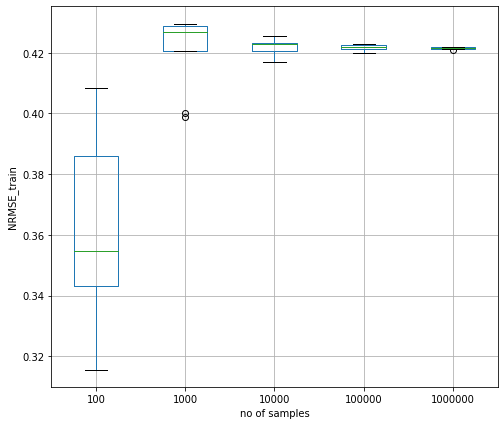

In [ ]:
df_train.boxplot(column=[100,1000,10000,100000,1000000],figsize=(8,7))
plt.xlabel("no of samples")
plt.ylabel("NRMSE_train")

Text(0, 0.5, 'NRMSE_vald')

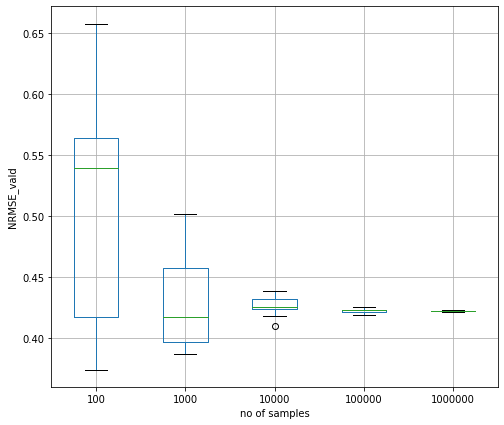

In [ ]:
df_vald.boxplot(column=[100,1000,10000,100000,1000000],figsize=(8,7))
plt.xlabel("no of samples")
plt.ylabel("NRMSE_vald")

In [ ]:
#13b
noise_var= 1.5
dim =[10,15,20,25,30,35]  # taking different feature dimensions
d_weights={}
for j in dim:
  np.random.seed(j)
  d_weights[j]=np.random.rand(j+1,1)
n1= 1000
d_NRMSE_train_b= {}
d_NRMSE_vald_b= {}
for i in dim:
    d_NRMSE_train_b[i] = None
    d_NRMSE_vald_b[i]= None

for j in dim:
  NRMSE_train1= []
  NRMSE_vald1= []
  for i in range (9):
    np.random.seed(i)
    x = data_matrix(n1,j)
    t = generate_t(x,d_weights[j],noise_var)
    x_train, x_vald, t_train, t_vald= train_test_split(x,t,test_size=0.3)
    std_t_train= np.std(t_train)
    arr1= est_weight_vector(x_train,t_train,lambda_)
    w_est= arr1[0]
    
    NRMSE_train= np.sqrt(arr1[1])/std_t_train
    NRMSE_train1.append(NRMSE_train)
   
    std_t_vald= np.std(t_vald)

    y_vald= lin_reg_y(x_vald,w_est)
    mse_vald= mse_error(t_vald,y_vald)

    NRMSE_vald= np.sqrt(mse_vald)/std_t_vald
    NRMSE_vald1.append(NRMSE_vald)
    
  d_NRMSE_train_b[j]= NRMSE_train1 #storing NRMSE of x train of a particular dimension into a dictionary
  d_NRMSE_vald_b[j]= NRMSE_vald1  #stpring NRMSE of x vald of a particul


In [ ]:
df_train_b= pd.DataFrame.from_dict(d_NRMSE_train_b)
df_vald_b= pd.DataFrame.from_dict(d_NRMSE_vald_b)

Text(0, 0.5, 'NRMSE_train')

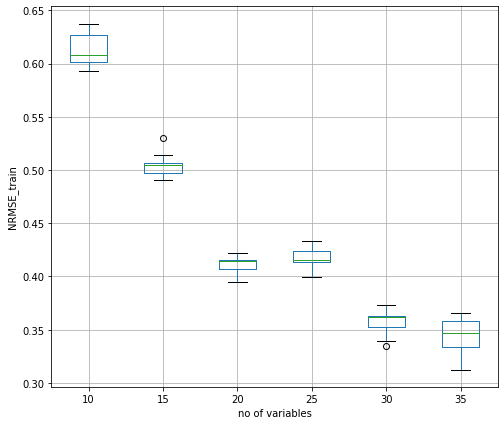

In [ ]:
df_train_b.boxplot(column=[10,15,20,25,30,35], figsize=(8,7))
plt.xlabel("no of variables")
plt.ylabel("NRMSE_train")

Text(0, 0.5, 'NRMSE_vald')

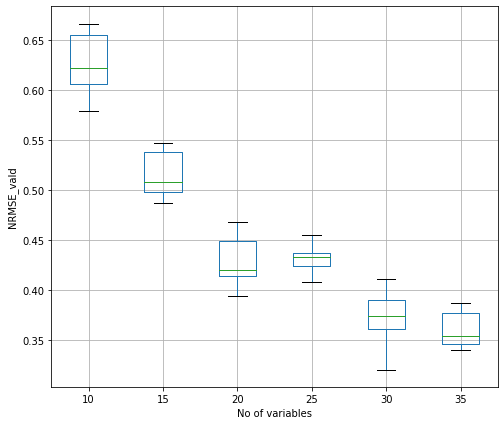

In [ ]:
df_vald_b.boxplot(column=[10,15,20,25,30,35], figsize=(8,7))
plt.xlabel("No of variables") 
plt.ylabel("NRMSE_vald")   

In [ ]:
#13c
noise_variance=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
n1= 1000
np.random.seed(100)
dimc= 20
weights_c= np.random.rand(dimc+1,1)
d_NRMSE_train_c= {}
d_NRMSE_vald_c= {}
for i in noise_variance:
    d_NRMSE_train_c[i] = None
    d_NRMSE_vald_c[i]= None

for j in noise_variance:
  NRMSE_train1= []
  NRMSE_vald1= []
  for i in range (9):
    np.random.seed(i)
    x = data_matrix(n1,dimc)
    t = generate_t(x,weights_c,j)
    x_train, x_vald, t_train, t_vald= train_test_split(x,t,test_size=0.3)
    std_t_train= np.std(t_train)
    arr1= est_weight_vector(x_train,t_train,lambda_)
    w_est= arr1[0]

    NRMSE_train= np.sqrt(arr1[1])/std_t_train
    NRMSE_train1.append(NRMSE_train)
   
    std_t_vald= np.std(t_vald)

    y_vald= lin_reg_y(x_vald,w_est)
    mse_vald= mse_error(t_vald,y_vald)

    NRMSE_vald= np.sqrt(mse_vald)/std_t_vald
    NRMSE_vald1.append(NRMSE_vald)
    
  d_NRMSE_train_c[j]= NRMSE_train1
  d_NRMSE_vald_c[j]= NRMSE_vald1


In [ ]:
df_train_c= pd.DataFrame.from_dict(d_NRMSE_train_c)
df_vald_c=pd.DataFrame.from_dict(d_NRMSE_vald_c)

Text(0, 0.5, 'NRMSE_train')

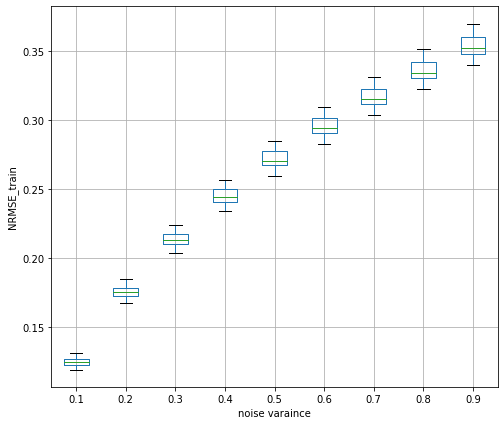

In [ ]:
df_train_c.boxplot(column=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], figsize=(8,7))
plt.xlabel("noise varaince")
plt.ylabel("NRMSE_train")

Text(0, 0.5, 'NRMSE_vald')

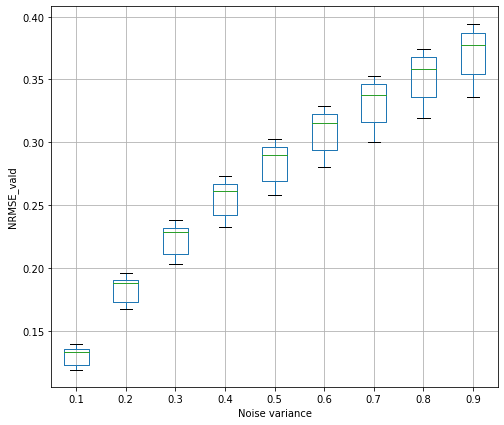

In [ ]:
df_vald_c.boxplot(column=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], figsize=(8,7))
plt.xlabel("Noise variance")
plt.ylabel("NRMSE_vald")

In [ ]:
#13d
noise_var_d=1.5
n1= 1000
dim_d=25
np.random.seed(100)
weights_exc_bias= np.random.rand(dim_d,1)
weights_d = {}
bias= np.linspace(0.9,40, num=10)
for i in bias:
  weights_d[i]= np.concatenate((weights_exc_bias,[[i]]))
d_NRMSE_train_d= {}
d_NRMSE_vald_d= {}
for i in bias:
    d_NRMSE_train_d[i] = None
    d_NRMSE_vald_d[i]= None

for j in bias:
  NRMSE_train1= []
  NRMSE_vald1= []
  for i in range (9):
    np.random.seed(i)
    x = data_matrix(n1,dim_d)
    t = generate_t(x,weights_d[j],noise_var_d)

    x_train, x_vald, t_train, t_vald= train_test_split(x,t,test_size=0.3)
    std_t_train= np.std(t_train)

    arr1= est_weight_vector(x_train,t_train,lambda_)
    w_est= arr1[0]

    NRMSE_train= np.sqrt(arr1[1])/std_t_train
    NRMSE_train1.append(NRMSE_train)
   
    std_t_vald= np.std(t_vald)

    y_vald= lin_reg_y(x_vald,w_est)
    mse_vald= mse_error(t_vald,y_vald)

    NRMSE_vald= np.sqrt(mse_vald)/std_t_vald
    NRMSE_vald1.append(NRMSE_vald)
    
  d_NRMSE_train_d[j]= NRMSE_train1
  d_NRMSE_vald_d[j]= NRMSE_vald1




In [ ]:
df_train_d= pd.DataFrame.from_dict(d_NRMSE_train_d)
df_vald_d= pd.DataFrame.from_dict(d_NRMSE_vald_d)

Text(0, 0.5, 'NRMSE_train')

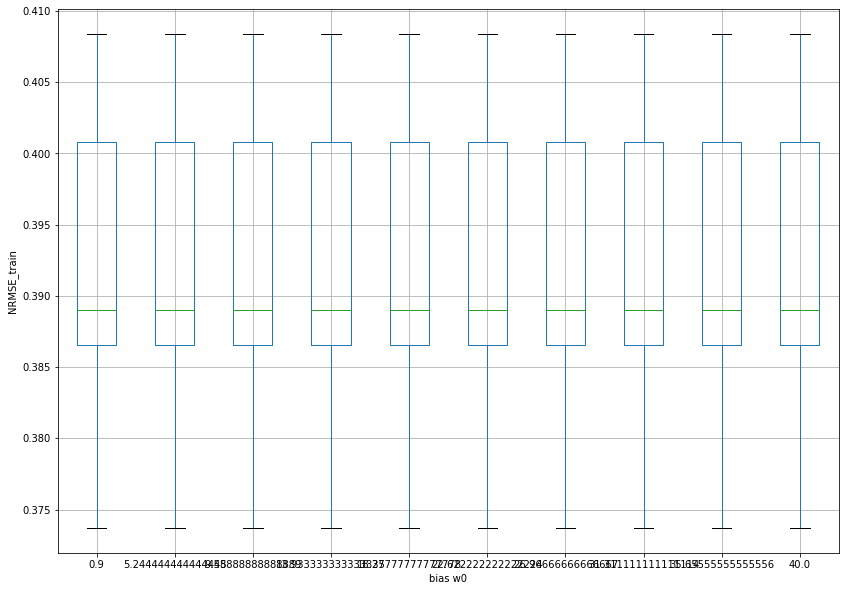

In [ ]:
df_train_d.boxplot(figsize=(14,10))
plt.xlabel("bias w0")
plt.ylabel("NRMSE_train")

Text(0, 0.5, 'NRMSE_vald')

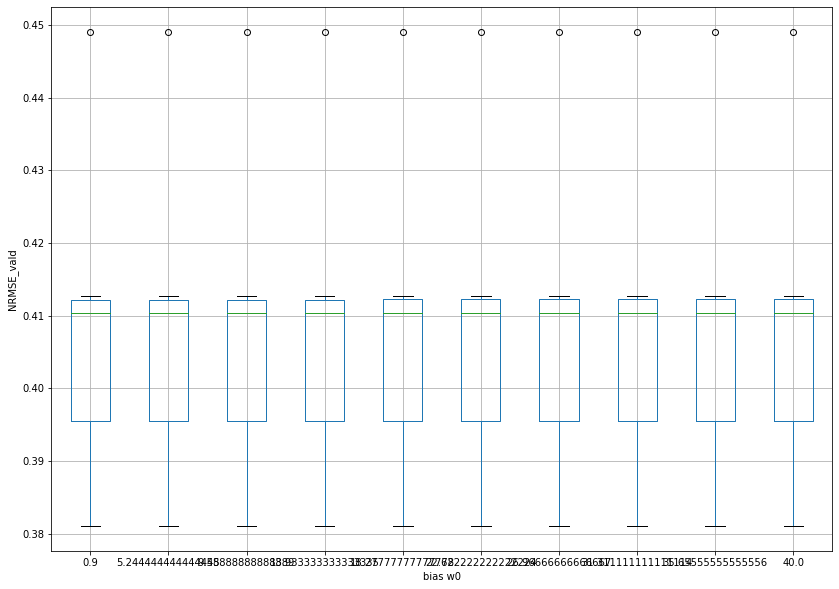

In [ ]:
df_vald_d.boxplot(figsize=(14,10))
plt.xlabel("bias w0")
plt.ylabel("NRMSE_vald")

In [ ]:
#13e
noise_var_e=0.9
n1= 1000
np.random.seed(100)
dimc= 20
weights_c= np.random.rand(dimc+1,1)
lambda_2= np.linspace(0.01,0.1, num=10)
d_NRMSE_train_e= {}
d_NRMSE_vald_e= {}
for i in lambda_2:
    d_NRMSE_train_e[i] = None
    d_NRMSE_vald_e[i]= None

for j in lambda_2:
  NRMSE_train1= []
  NRMSE_vald1= []
  for i in range (9):
    np.random.seed(i)
    x = data_matrix(n1,dimc)
    t = generate_t(x,weights_c,j)
    x_train, x_vald, t_train, t_vald= train_test_split(x,t,test_size=0.3)
    std_t_train= np.std(t_train)
    arr1= est_weight_vector(x_train,t_train,j)
    w_est= arr1[0]

    NRMSE_train= np.sqrt(arr1[1])/std_t_train
    NRMSE_train1.append(NRMSE_train)
   
    std_t_vald= np.std(t_vald)

    y_vald= lin_reg_y(x_vald,w_est)
    mse_vald= mse_error(t_vald,y_vald)

    NRMSE_vald= np.sqrt(mse_vald)/std_t_vald
    NRMSE_vald1.append(NRMSE_vald)
    
  d_NRMSE_train_e[j]= NRMSE_train1
  d_NRMSE_vald_e[j]= NRMSE_vald1

In [ ]:
df_train_e= pd.DataFrame.from_dict(d_NRMSE_train_e)
df_vald_e= pd.DataFrame.from_dict(d_NRMSE_vald_e)

Text(0, 0.5, 'NRMSE_train')

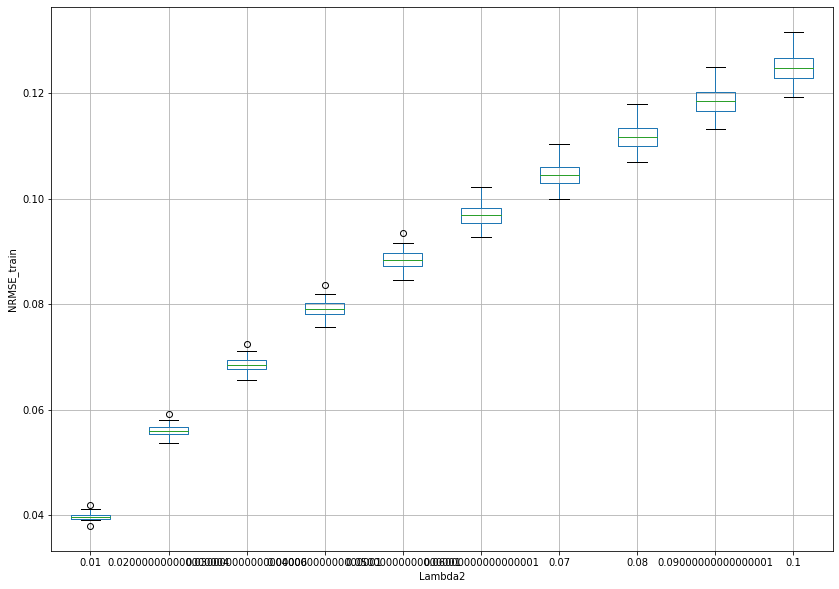

In [ ]:
df_train_e.boxplot(figsize=(14,10))
plt.xlabel("Lambda2")
plt.ylabel("NRMSE_train")

Text(0, 0.5, 'NRMSE_vald')

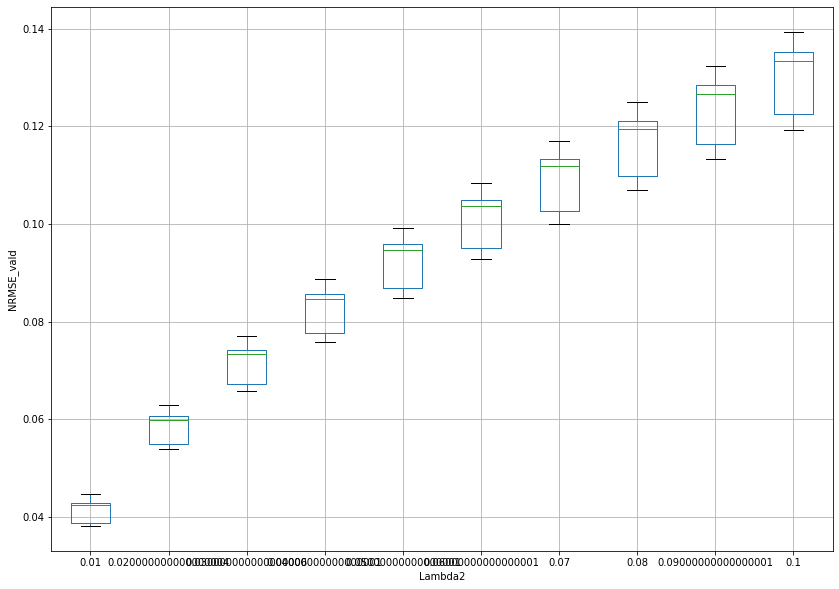

In [ ]:
df_vald_e.boxplot(figsize=(14,10))
plt.xlabel("Lambda2")
plt.ylabel("NRMSE_vald")

In [ ]:
#13f
begin = time.time()
d= 20
np.random.seed(50)
weights= np.random.rand(d+1,1)
w0= weights[d]
noise_var=1.5

n= [100,1000,10000,100000,1000000,10000000]
time_taken = {}
for i in n:
  time_taken[i]= None
d_NRMSE_train= {}
d_NRMSE_vald= {}
for i in n:
    d_NRMSE_train[i] = None
    d_NRMSE_vald[i]= None

for num_samples in n:
  begin = time.time()
  NRMSE_train1= []
  NRMSE_vald1= []
  for i in range (9):
    np.random.seed(i)
    x = data_matrix(num_samples,d)
    t = generate_t(x,weights,noise_var)
    x_train, x_vald, t_train, t_vald= train_test_split(x,t,test_size=0.2,shuffle=True,random_state=8)
    std_t_train= np.std(t_train)
    arr1= est_weight_vector(x_train,t_train,lambda_)
    w_est= arr1[0]

    NRMSE_train= np.sqrt(arr1[1])/std_t_train
    NRMSE_train1.append(NRMSE_train)

    
    std_t_vald= np.std(t_vald)

    y_vald= lin_reg_y(x_vald,w_est)
    mse_vald= mse_error(t_vald,y_vald)

    NRMSE_vald= np.sqrt(mse_vald)/std_t_vald
    NRMSE_vald1.append(NRMSE_vald)  
  d_NRMSE_train[num_samples]= NRMSE_train1
  d_NRMSE_vald[num_samples]= NRMSE_vald1
  end = time.time()
  time_taken[num_samples]= end- begin


My program got crashed when I gave num_samples = 10^8. no of samples= 10^8 is my breaking point


In [ ]:
time_taken

{100: 0.02389812469482422,
 1000: 0.03012394905090332,
 10000: 0.153245210647583,
 100000: 1.467712163925171,
 1000000: 15.417747259140015,
 10000000: 116.52607488632202}

In [ ]:
#13f
noise_var= 1.5
dim =[100,1000,10000,100000]
time_taken2 = {}
for i in dim:
  time_taken2[i]= None
d_weights={}
for j in dim:
  np.random.seed(j)
  d_weights[j]=np.random.rand(j+1,1)
n1= 1000
d_NRMSE_train_b= {}
d_NRMSE_vald_b= {}
for i in dim:
    d_NRMSE_train_b[i] = None
    d_NRMSE_vald_b[i]= None

for j in dim:
  begin= time.time()
  NRMSE_train1= []
  NRMSE_vald1= []
  for i in range (9):
    np.random.seed(i)
    x = data_matrix(n1,j)
    t = generate_t(x,d_weights[j],noise_var)
    x_train, x_vald, t_train, t_vald= train_test_split(x,t,test_size=0.3)
    std_t_train= np.std(t_train)
    arr1= est_weight_vector(x_train,t_train,lambda_)
    w_est= arr1[0]
    
    NRMSE_train= np.sqrt(arr1[1])/std_t_train
    NRMSE_train1.append(NRMSE_train)
   
    std_t_vald= np.std(t_vald)

    y_vald= lin_reg_y(x_vald,w_est)
    mse_vald= mse_error(t_vald,y_vald)

    NRMSE_vald= np.sqrt(mse_vald)/std_t_vald
    NRMSE_vald1.append(NRMSE_vald)
 
  d_NRMSE_train_b[j]= NRMSE_train1
  d_NRMSE_vald_b[j]= NRMSE_vald1
  end= time.time()
  time_taken2[j]= end- begin 

10^ no of variables is my breaking point

In [ ]:
#13g
noise_var_e=0.9
eta=0.5
min_change_NRMSE=0.3
lambda1=0.01
lambda2=0.02
max_iterat= [10,100,1000,100000,1000000]

n1= 1000
np.random.seed(100)
dimc= 20
weights_c= np.random.rand(dimc+1,1)
d_NRMSE_train_g= {}
d_NRMSE_vald_g= {}
for i in max_iterat:
    d_NRMSE_train_g[i] = None
    d_NRMSE_vald_g[i]= None

for j in max_iterat:
  NRMSE_train1= []
  NRMSE_vald1= []
  for i in range (9):
    np.random.seed(i)
    x = data_matrix(n1,dimc)
    t = generate_t(x,weights_c,lambda_)
    x_train, x_vald, t_train, t_vald= train_test_split(x,t,test_size=0.3)
    std_t_train= np.std(t_train)
    arr2= grad_descent(x_train,t_train,eta,j,min_change_NRMSE,lambda2,lambda1)
    upd_w= arr2[0]
    NRMSE_train= arr2[1]
    NRMSE_train1.append(NRMSE_train)
   
    std_t_vald= np.std(t_vald)
    y_vald= lin_reg_y(x_vald,upd_w)
    mse_vald= mse_error(t_vald,y_vald)

    NRMSE_vald= np.sqrt(mse_vald)/std_t_vald
    NRMSE_vald1.append(NRMSE_vald)
    
  d_NRMSE_train_g[j]= NRMSE_train1
  d_NRMSE_vald_g[j]= NRMSE_vald1

In [ ]:
df_train_g= pd.DataFrame.from_dict(d_NRMSE_train_g)
df_vald_g= pd.DataFrame.from_dict(d_NRMSE_vald_g)

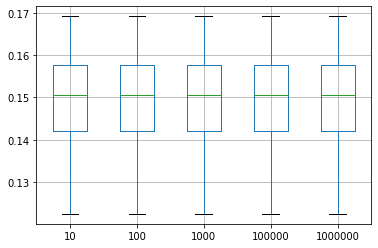

In [ ]:
df_vald_g.boxplot()

In [ ]:
#13h
noise_var_e=0.9
eta_= np.linspace(0.1,1, num=10)
min_change_NRMSE=0.1
lambda1=0.01
lambda2=0.02
max_iterat= 100

n1= 1000
np.random.seed(100)
dimc= 20
weights_c= np.random.rand(dimc+1,1)
d_NRMSE_train_h= {}
d_NRMSE_vald_h= {}
for i in eta_:
    d_NRMSE_train_h[i] = None
    d_NRMSE_vald_h[i]= None

for j in eta_:
  NRMSE_train1= []
  NRMSE_vald1= []
  for i in range (9):
    np.random.seed(i)
    x = data_matrix(n1,dimc)
    t = generate_t(x,weights_c,lambda_)
    x_train, x_vald, t_train, t_vald= train_test_split(x,t,test_size=0.3)
    std_t_train= np.std(t_train)
    arr2= grad_descent(x_train,t_train,j,max_iterat,min_change_NRMSE,lambda2=0,lambda1=0)
    upd_w= arr2[0]
    NRMSE_train= arr2[1]
    NRMSE_train1.append(NRMSE_train)
   
    std_t_vald= np.std(t_vald)
    y_vald= lin_reg_y(x_vald,upd_w)
    mse_vald= mse_error(t_vald,y_vald)

    NRMSE_vald= np.sqrt(mse_vald)/std_t_vald
    NRMSE_vald1.append(NRMSE_vald)
    
  d_NRMSE_train_h[j]= NRMSE_train1
  d_NRMSE_vald_h[j]= NRMSE_vald1

In [ ]:
df_train_h= pd.DataFrame.from_dict(d_NRMSE_train_h)
df_vald_h= pd.DataFrame.from_dict(d_NRMSE_vald_h)

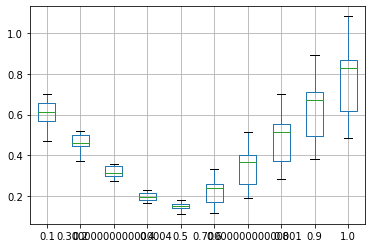

In [ ]:
df_train_h.boxplot()

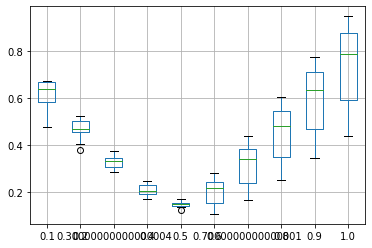

In [ ]:
df_vald_h.boxplot()

In [ ]:
#13k
noise_var_e=0.9
eta_= 0.1
min_change_NRMSE=0.1
lambda1=0.01
lambda2_= np.linspace(0.001,0.05,num=10)
max_iterat= 100

n1= 1000
np.random.seed(100)
dimc= 20
weights_c= np.random.rand(dimc+1,1)
d_NRMSE_train_k= {}
d_NRMSE_vald_k= {}
for i in lambda2_:
    d_NRMSE_train_k[i] = None
    d_NRMSE_vald_k[i]= None

for j in lambda2_:
  NRMSE_train1= []
  NRMSE_vald1= []
  for i in range (9):
    np.random.seed(i)
    x = data_matrix(n1,dimc)
    t = generate_t(x,weights_c,lambda_)
    x_train, x_vald, t_train, t_vald= train_test_split(x,t,test_size=0.3)
    std_t_train= np.std(t_train)
    arr2= grad_descent(x_train,t_train,eta_,max_iterat,min_change_NRMSE,j,lambda1)
    upd_w= arr2[0]
    NRMSE_train= arr2[1]
    NRMSE_train1.append(NRMSE_train)
   
    std_t_vald= np.std(t_vald)
    y_vald= lin_reg_y(x_vald,upd_w)
    mse_vald= mse_error(t_vald,y_vald)

    NRMSE_vald= np.sqrt(mse_vald)/std_t_vald
    NRMSE_vald1.append(NRMSE_vald)
    
  d_NRMSE_train_k[j]= NRMSE_train1
  d_NRMSE_vald_k[j]= NRMSE_vald1

In [ ]:
df_train_k= pd.DataFrame.from_dict(d_NRMSE_train_k)
df_vald_k= pd.DataFrame.from_dict(d_NRMSE_vald_k)

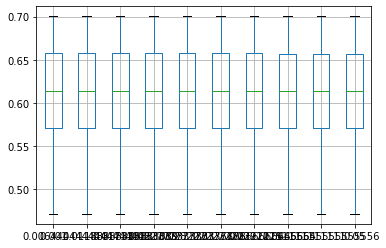

In [ ]:
df_train_k.boxplot()

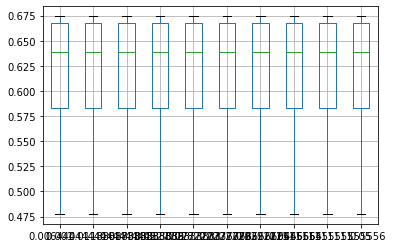

In [ ]:
df_vald_k.boxplot()

In [ ]:
#13l
noise_var_e=0.9
eta_= 0.1
min_change_NRMSE=0.1
lambda2=0.01
lambda1_= np.linspace(0.001,0.05,num=10)
max_iterat= 100

n1= 1000
np.random.seed(100)
dimc= 20
weights_c= np.random.rand(dimc+1,1)
d_NRMSE_train_l= {}
d_NRMSE_vald_l= {}
for i in lambda1_:
    d_NRMSE_train_l[i] = None
    d_NRMSE_vald_l[i]= None

for j in lambda1_:
  NRMSE_train1= []
  NRMSE_vald1= []
  for i in range (9):
    np.random.seed(i)
    x = data_matrix(n1,dimc)
    t = generate_t(x,weights_c,lambda_)
    x_train, x_vald, t_train, t_vald= train_test_split(x,t,test_size=0.3)
    std_t_train= np.std(t_train)
    arr2= grad_descent(x_train,t_train,eta_,max_iterat,min_change_NRMSE,lambda2,j)
    upd_w= arr2[0]
    NRMSE_train= arr2[1]
    NRMSE_train1.append(NRMSE_train)
   
    std_t_vald= np.std(t_vald)
    y_vald= lin_reg_y(x_vald,upd_w)
    mse_vald= mse_error(t_vald,y_vald)

    NRMSE_vald= np.sqrt(mse_vald)/std_t_vald
    NRMSE_vald1.append(NRMSE_vald)
    
  d_NRMSE_train_l[j]= NRMSE_train1
  d_NRMSE_vald_l[j]= NRMSE_vald1

In [ ]:
df_train_l= pd.DataFrame.from_dict(d_NRMSE_train_l)
df_vald_l= pd.DataFrame.from_dict(d_NRMSE_vald_l)

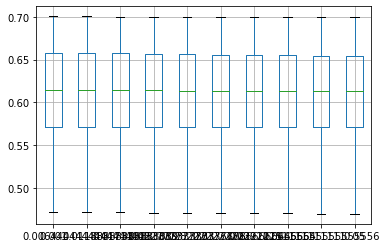

In [ ]:
df_train_l.boxplot()

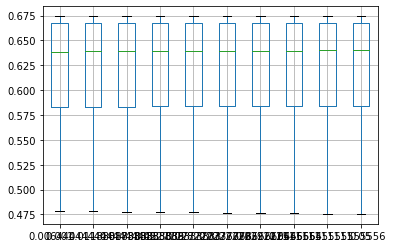

In [ ]:
df_vald_l.boxplot()

In [ ]:
#13m
lambda2=0.01  #my optimal lambda 2
noise_variance=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
n1= 1000
np.random.seed(100)
dimc= 20
weights_c= np.random.rand(dimc+1,1)
d_NRMSE_train_m= {}
d_NRMSE_vald_m= {}
for i in noise_variance:
    d_NRMSE_train_m[i] = None
    d_NRMSE_vald_m[i]= None

for j in noise_variance:
  NRMSE_train1= []
  NRMSE_vald1= []
  for i in range (9):
    np.random.seed(i)
    x = data_matrix(n1,dimc)
    t = generate_t(x,weights_c,j)
    x_train, x_vald, t_train, t_vald= train_test_split(x,t,test_size=0.3)
    std_t_train= np.std(t_train)
    arr2= grad_descent(x_train,t_train,eta_,max_iterat,min_change_NRMSE,lambda2)
    upd_w= arr2[0]
    NRMSE_train= arr2[1]
    NRMSE_train1.append(NRMSE_train)
   
    std_t_vald= np.std(t_vald)
    y_vald= lin_reg_y(x_vald,upd_w)
    mse_vald= mse_error(t_vald,y_vald)

    NRMSE_vald= np.sqrt(mse_vald)/std_t_vald
    NRMSE_vald1.append(NRMSE_vald)
    
  d_NRMSE_train_m[j]= NRMSE_train1
  d_NRMSE_vald_m[j]= NRMSE_vald1

In [ ]:
df_train_m= pd.DataFrame.from_dict(d_NRMSE_train_m)
df_vald_m = pd.DataFrame.from_dict(d_NRMSE_vald_m)

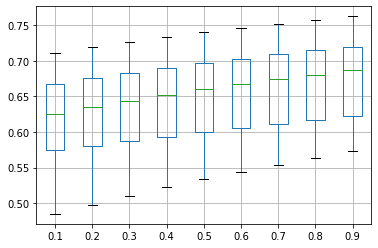

In [ ]:
df_train_m.boxplot()

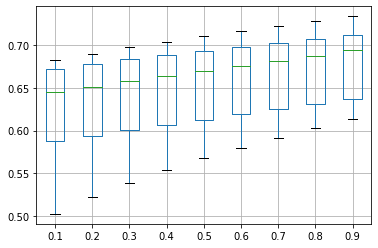

In [ ]:
df_vald_m.boxplot()

In [ ]:
#13n
lambda1=0.01  #my optimal lambda1
noise_variance=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
n1= 1000
np.random.seed(100)
dimc= 20
weights_c= np.random.rand(dimc+1,1)
d_NRMSE_train_n= {}
d_NRMSE_vald_n= {}
for i in noise_variance:
    d_NRMSE_train_n[i] = None
    d_NRMSE_vald_n[i]= None

for j in noise_variance:
  NRMSE_train1= []
  NRMSE_vald1= []
  for i in range (9):
    np.random.seed(i)
    x = data_matrix(n1,dimc)
    t = generate_t(x,weights_c,j)
    x_train, x_vald, t_train, t_vald= train_test_split(x,t,test_size=0.3)
    std_t_train= np.std(t_train)
    arr2= grad_descent(x_train,t_train,eta_,max_iterat,min_change_NRMSE,lambda2=0,lambda1=0.01)
    upd_w= arr2[0]
    NRMSE_train= arr2[1]
    NRMSE_train1.append(NRMSE_train)
   
    std_t_vald= np.std(t_vald)
    y_vald= lin_reg_y(x_vald,upd_w)
    mse_vald= mse_error(t_vald,y_vald)

    NRMSE_vald= np.sqrt(mse_vald)/std_t_vald
    NRMSE_vald1.append(NRMSE_vald)
    
  d_NRMSE_train_n[j]= NRMSE_train1
  d_NRMSE_vald_n[j]= NRMSE_vald1

In [ ]:
df_train_n= pd.DataFrame.from_dict(d_NRMSE_train_n)
df_vald_n = pd.DataFrame.from_dict(d_NRMSE_vald_n)

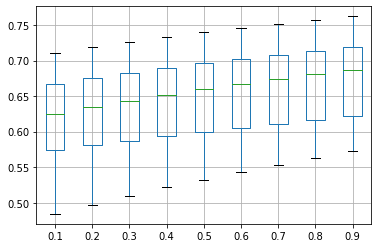

In [ ]:
df_train_n.boxplot()

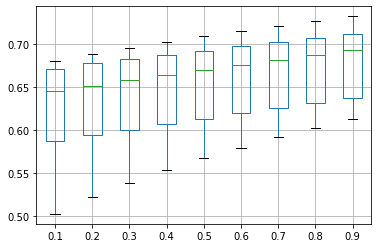

In [ ]:
df_vald_n.boxplot()

QUESTION 14
my learning points of this assignment include:
1. calculating NRMSE value by using pseudo inverse method by taking different number of samples and different variables
2. Calculating NRMSE value by using gradient descent method by varying the maximum iterations, eta value, lambda1 and lambda2
3.How to practically do the linear regression
4. comparing the data by plotting the box plots
5. How to code good and efficient use of functions


QUESTION 15
my refferences
1. used geeks for geeks and numpy official documentation for python( for functions and matplotlib)
the people with whom I discussed
1. Subbu Srikantam(roll no: 200260054)- discussed the 11th question for the formula of updated weights
2. Abhishek anand(roll no: 200260002)- discussed the 13a part about how to do training and validation